In [2]:
library(dslabs)
library(HistData)

library(tidyverse)

In [2]:
data(heights)
data(Galton)
data(murders)

In [3]:
# HarvardX Data Science Course
# Module 2: Data Visualization

In [4]:
x <- Galton$child
x_with_error <- x
x_with_error[1] <- x_with_error[1] * 10
mean(x_with_error) - mean(x)

[1] 0.5983836

In [5]:
sd(x_with_error) - sd(x)

[1] 15.6746

In [6]:
# Median and MAD (median absolute deviation) are robust measurements
median(x_with_error) - median(x)
mad(x_with_error) - mad(x)

[1] 0

[1] 0

In [7]:
# Using EDA (exploratory data analisys) to explore changes
# Returns the average of the vector x after the first entry changed to k
error_avg <- function(k) {
    z <- x
    z[1] = k
    mean(z)
}

error_avg(10^4)
error_avg(-10^4)

[1] 78.79784

[1] 57.24612

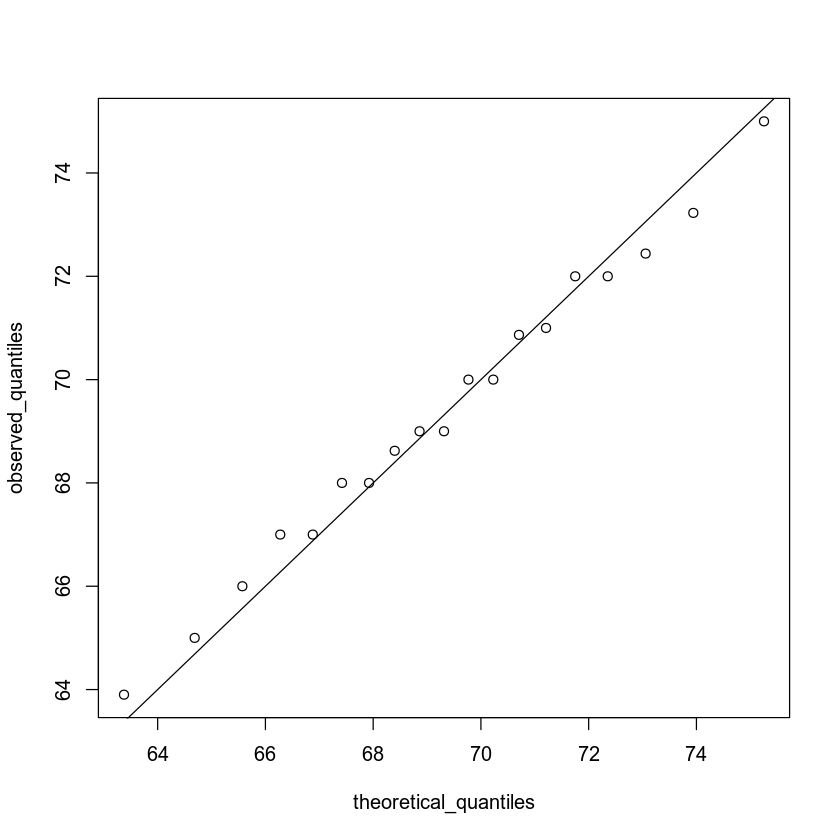

In [8]:
# Quantile-quantile Plots
male_heights <- heights$height[heights$sex == 'Male']
p <- seq(0.05, 0.95, 0.05)
observed_quantiles <- quantile(male_heights, p)
theoretical_quantiles <- qnorm(p, mean=mean(male_heights), sd=sd(male_heights))

plot(theoretical_quantiles, observed_quantiles)
abline(0,1)

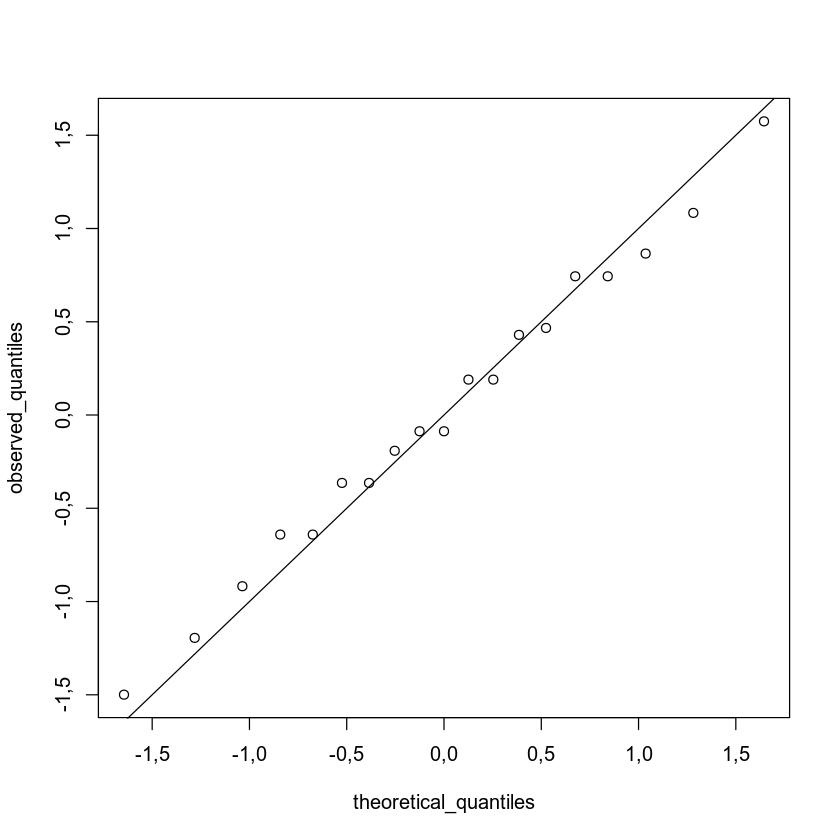

In [9]:
# It is better to use standard units
z <- scale(male_heights)
observed_quantiles <- quantile(z, p)
theoretical_quantiles <- qnorm(p)
plot(theoretical_quantiles, observed_quantiles)
abline(0,1)

In [10]:
# Porcentiles: when the value of p = 0.01...0.99

In [11]:
# Excercises
male <- heights$height[heights$sex == 'Male']
female <- heights$height[heights$sex == 'Female']

length(male)
length(female)

[1] 812

[1] 238

In [12]:
male_percentiles <- quantile(male, seq(0.1, 0.9, 0.2))
female_percentiles <- quantile(female, seq(0.1, 0.9, 0.2))

df <- data.frame(female=female_percentiles, male=male_percentiles)
df

,female,male
10%,"61,00000","65,00000"
30%,"63,00000","68,00000"
50%,"64,98031","69,00000"
70%,"66,46417","71,00000"
90%,"69,00000","73,22751"


In [13]:
# Excercises uing Galton data
mean(x)
median(x)

[1] 68,08847

[1] 68,2

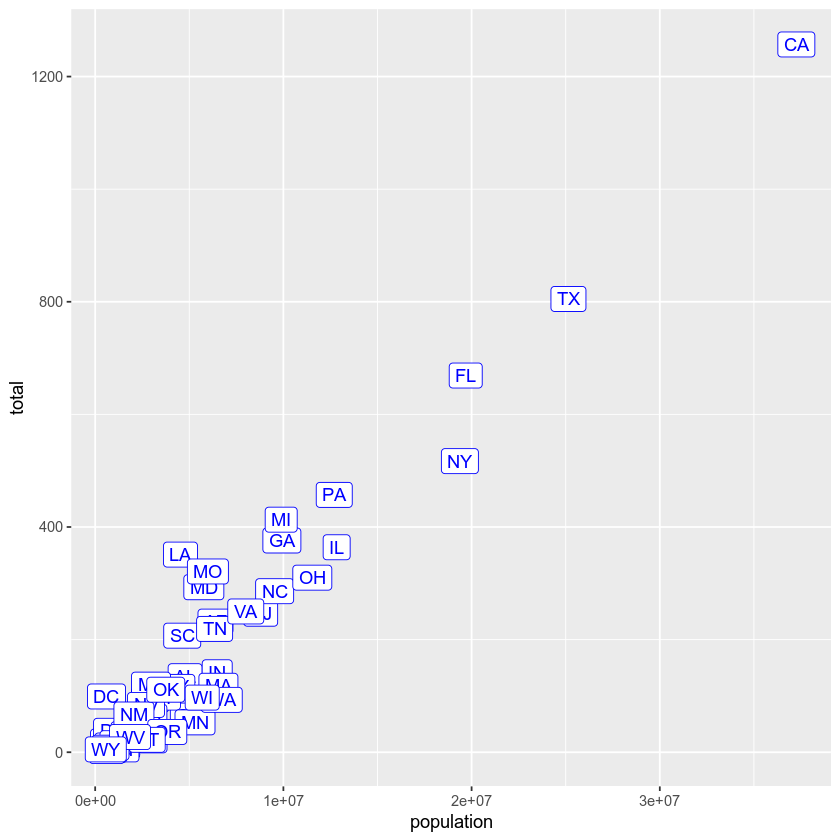

In [19]:
# ggplot2 basics

murders %>% ggplot(aes(population, total, label = abb)) + geom_point() + geom_label(color = 'blue')


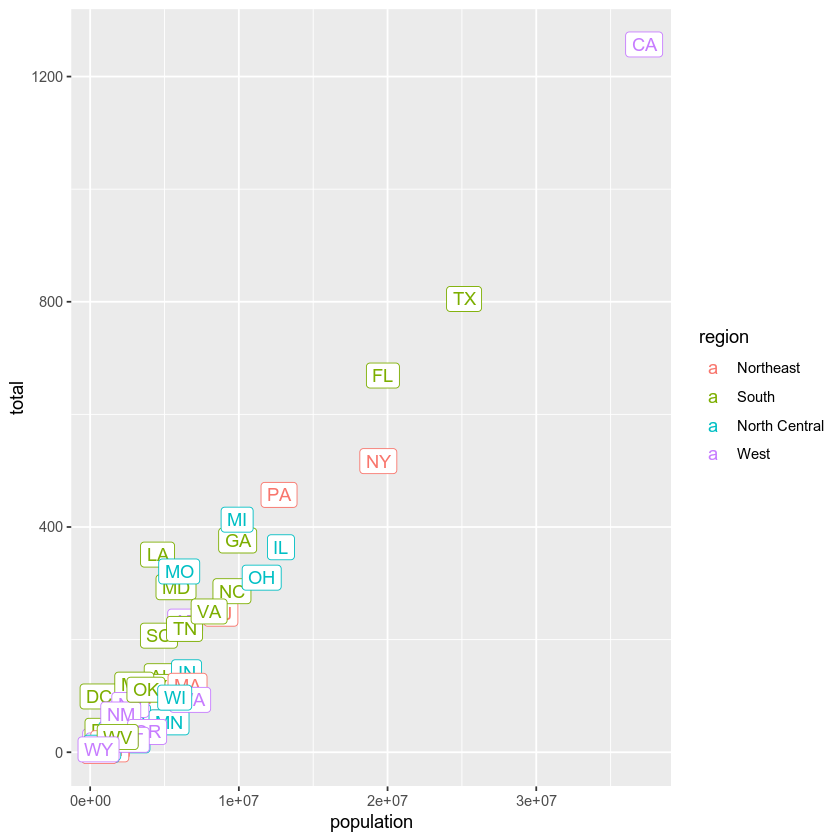

In [18]:
murders_plot <- murders %>% ggplot(aes(population, total, label = abb, color = region)) 
murders_plot + geom_point() + geom_label()

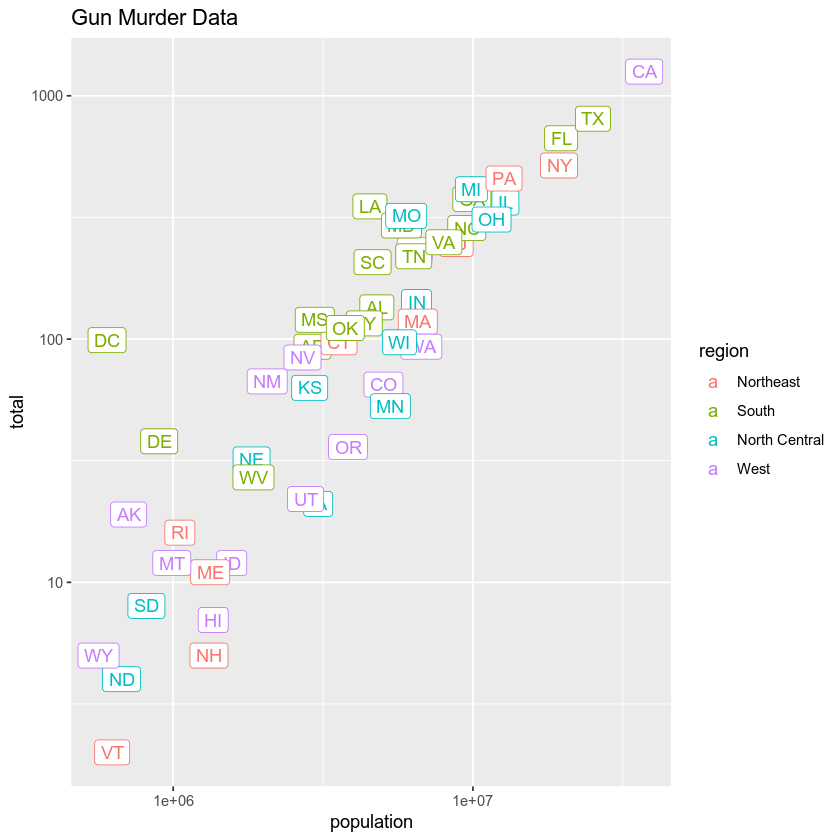

In [20]:
murders_plot + 
    geom_point() +
    geom_label() +
    scale_x_log10() + 
    scale_y_log10() + 
    ggtitle('Gun Murder Data')

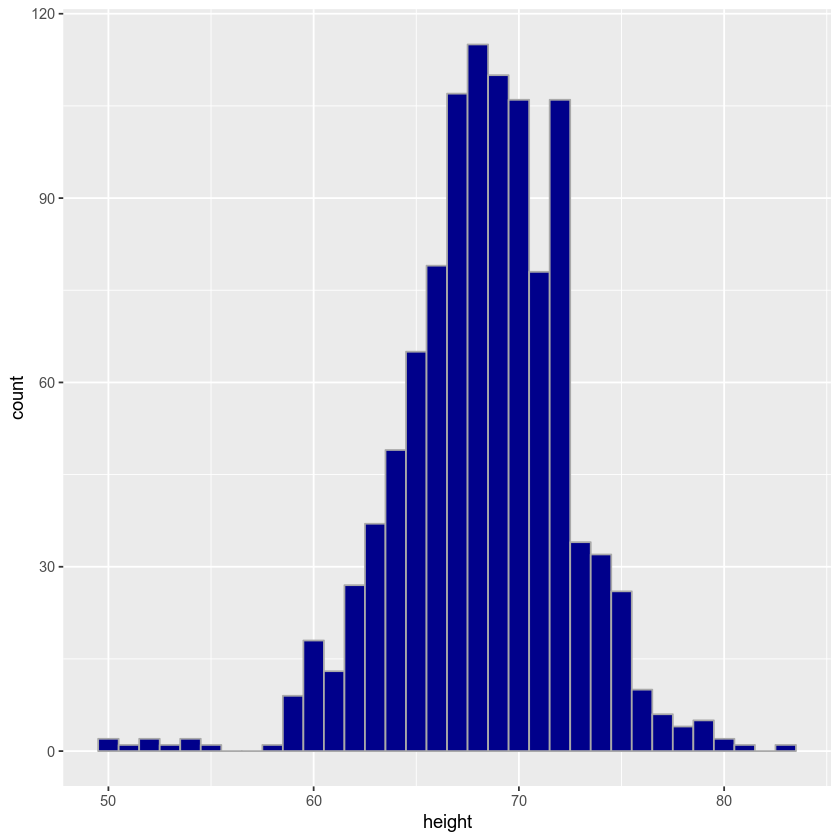

In [63]:
heights_plot <- heights %>% ggplot(aes(x = height))
heights_plot + geom_histogram(binwidth = 1, color = 'darkgrey', fill = 'darkblue')

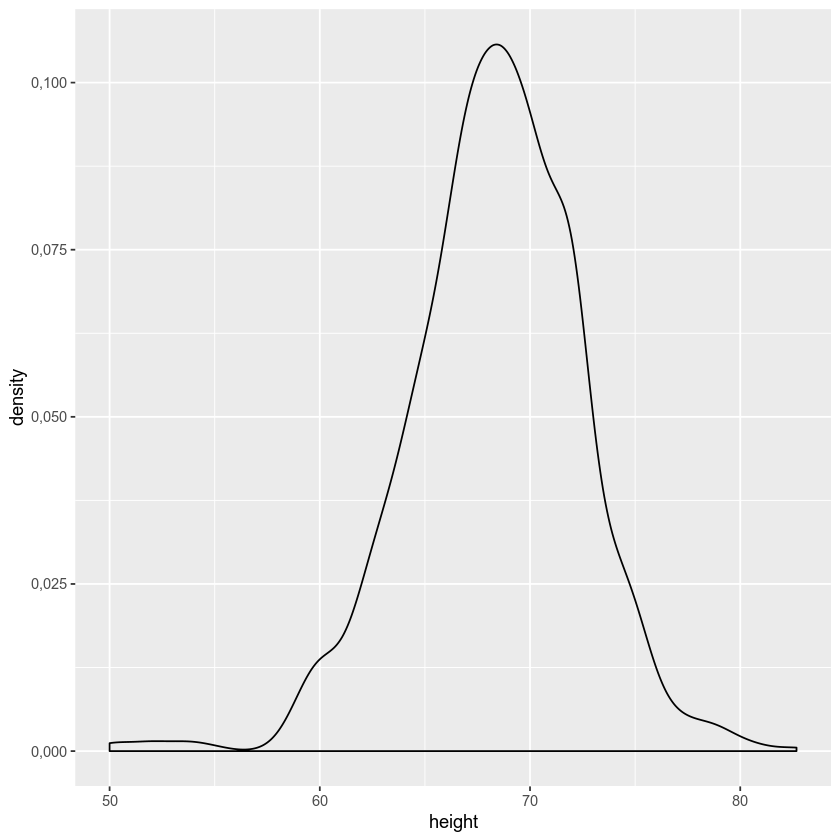

In [34]:
heights %>% ggplot(aes(height)) + geom_density()

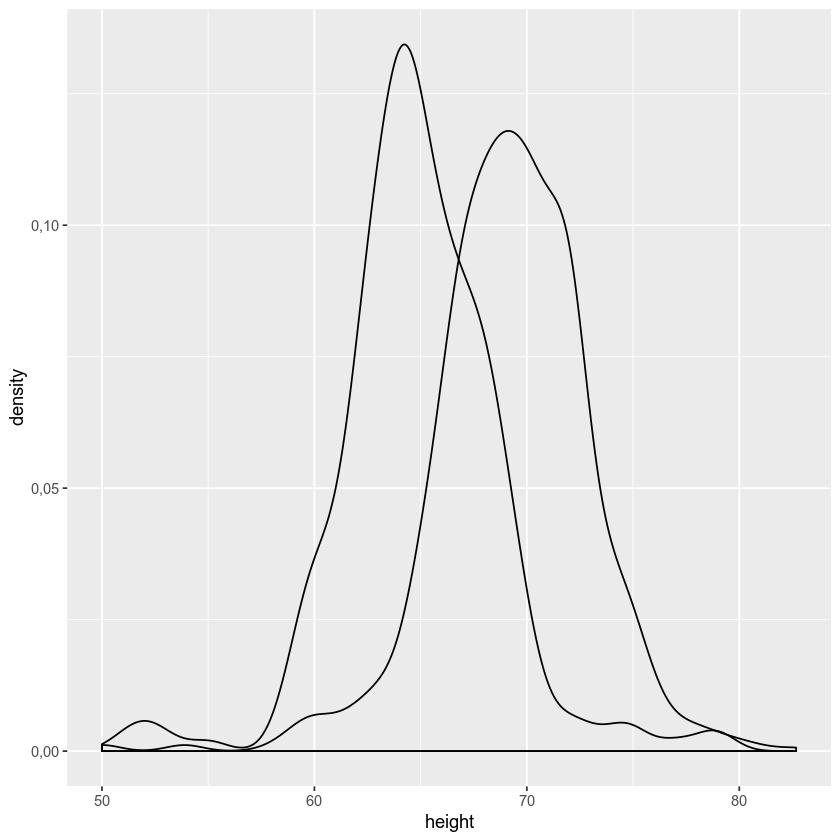

In [35]:
heights %>% ggplot(aes(x = height, group = sex)) + geom_density()

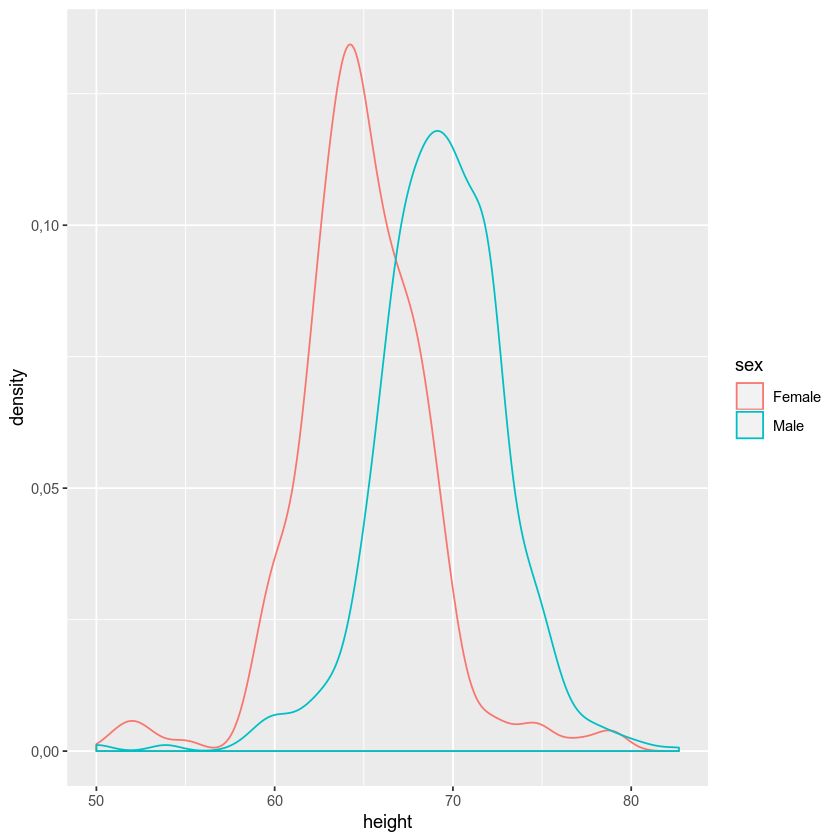

In [37]:
# When setting a color category ggplot know that it has to draw more than 1 plot so the 'group' param is inferred
heights %>% ggplot(aes(x = height, color = sex)) + geom_density()

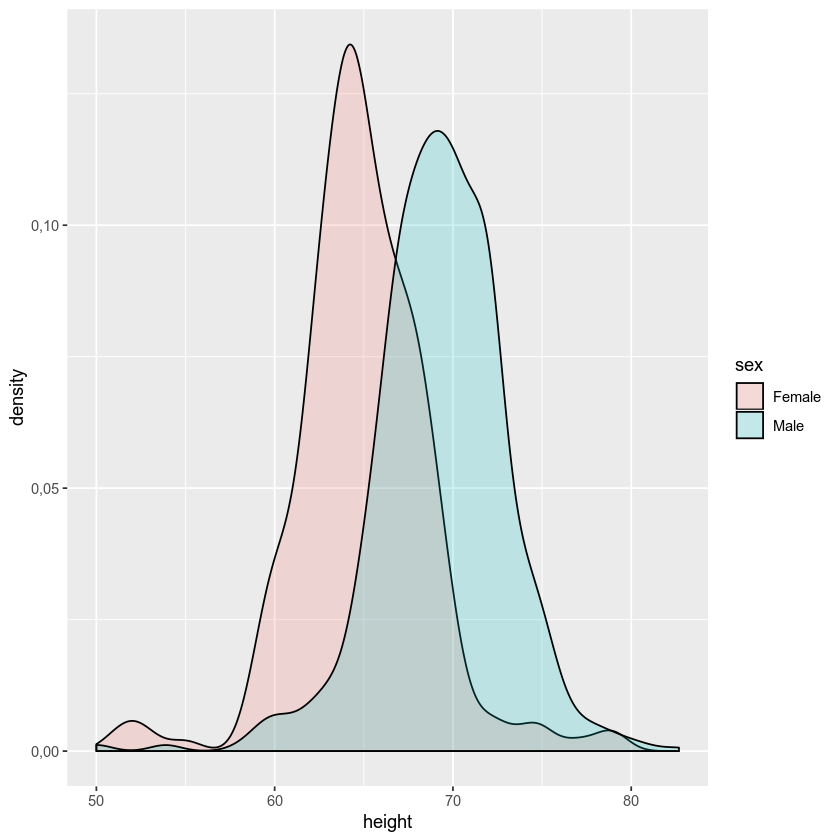

In [66]:
heights_plot <- heights %>% ggplot(aes(x = height, fill = sex)) + geom_density(alpha = 0.2)
heights_plot

In [17]:
# These two lines achieve the same, summarize creates a second data frame with a single column "rate", .$rate reads the single value finally to the "r" object, see ?summarize
r <- sum(murders$total) / sum(murders$population) * 10^6
r <- murders %>% summarize(rate = sum(total) / sum(population) * 10^6) %>% .$rate

[1] 30.34555

In [59]:
library(ggthemes)
library(ggrepel)

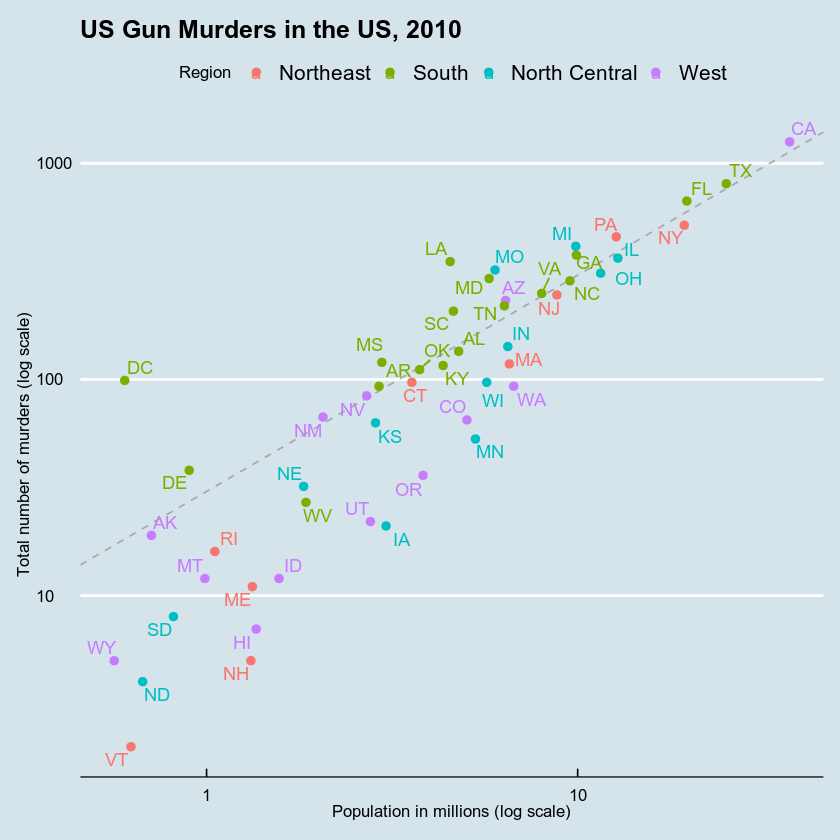

In [64]:
murders_plot <- murders %>% ggplot(aes(x = population / 10^6, y = total, color = region, label = abb))
murders_plot <- murders_plot +
    geom_abline(intercept = log10(r), lty = 2, color = 'darkgray') +
    geom_point(size = 2) +
    geom_text_repel() +
    scale_x_log10() +
    scale_y_log10() + 
    ggtitle("US Gun Murders in the US, 2010") +
    xlab("Population in millions (log scale)") +
    ylab("Total number of murders (log scale)") +
    scale_color_discrete(name = 'Region') +
    theme_economist()
murders_plot

In [69]:
library(gridExtra)

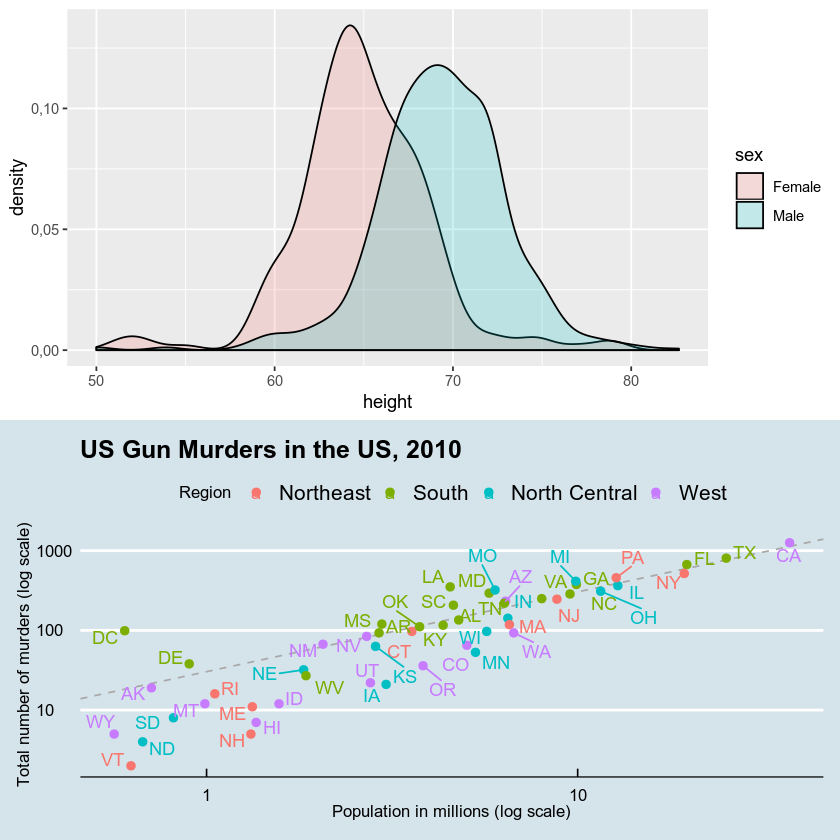

In [72]:
grid.arrange(heights_plot, murders_plot, ncol = 1)